In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

house=pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/Case 2/3 California Housing Price/housing-Nancy.csv")

In [13]:
x=house.iloc[:,:-1]
y=house.loc[:,"MedHouseVal"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=30)
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=71, random_state=30)
rf.fit(Xtrain, Ytrain)
r1 = rf.score(Xtrain, Ytrain)
r2 = rf.score(Xtest, Ytest)

In [15]:
r1

0.9770710310707635

In [16]:
r2

0.8297882841015632

In [21]:
y_pred=rf.predict(Xtest)

In [18]:
# The score seems okay, look for better value of the parameters
from sklearn.model_selection import GridSearchCV
param_test1 = {"n_estimators":range(1,101,10)}
gsearch1 = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_test1,cv=10)
GS=gsearch1.fit(Xtest,Ytest)

print(GS.best_params_)
print(GS.best_score_)

{'n_estimators': 91}
0.8095287942538517


0.8098729070368627 24


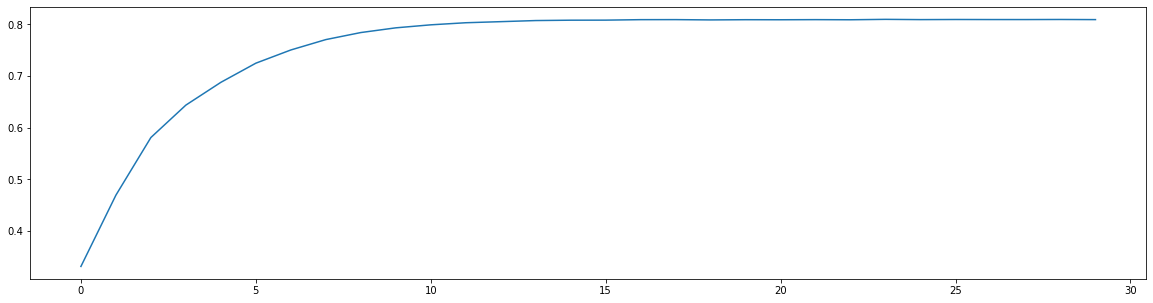

In [19]:
scorel = []
for i in range(0,30):       
    rfr = RandomForestRegressor(n_estimators=71,      
                                 max_depth=i+1,
                                 random_state=30)
    score = cross_val_score(rfr,Xtest,Ytest,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel)))+1)
plt.figure(figsize=[20,5])
plt.plot(range(0,30),scorel)   
plt.show()

0.8098729070368627 9


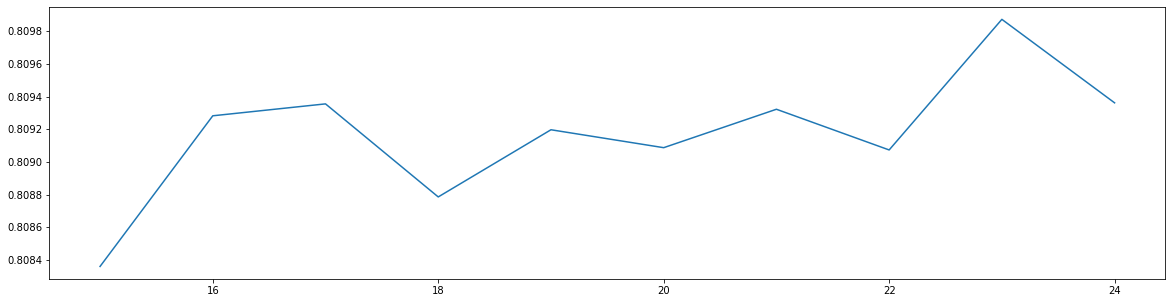

In [20]:
scorel = []
for i in range(15,25):       
    rfr = RandomForestRegressor(n_estimators=71,      
                                 max_depth=i+1,
                                 random_state=30)
    score = cross_val_score(rfr,Xtest,Ytest,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel)))+1)
plt.figure(figsize=[20,5])
plt.plot(range(15,25),scorel)   
plt.show()